In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
#load up all the data
inputfolder = 'data'
filelist = os.listdir(inputfolder)
framedict = dict()
for file in filelist:
    filename,ext = os.path.splitext(file)
    pathway = os.path.join(inputfolder,file)
#     print(pathway)
    tempdf = pd.read_csv(pathway)
    framedict[filename] = tempdf
    del tempdf
dictnames = [x for x in framedict.keys()]
print(dictnames)

['ATP_matches', 'aus_open_men_match_odds', 'aus_open_men_tournament_odds', 'aus_open_women_match_odds', 'aus_open_women_tournament_odds', 'WTA_matches']


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12,13,14,17,18,24,25,26,27,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Looking at the mens data

In [3]:
#load mens dataframes into variables and inspect data
ATPframe = framedict['ATP_matches'].copy() #we copy so we can run the code multiple times without errors, not really necessary
AOMensMatchOdds = framedict[ 'aus_open_men_match_odds'].copy()
AOMensTournOdds = framedict['aus_open_men_tournament_odds'].copy()
display(ATPframe.head())
display(AOMensMatchOdds.head())
display(AOMensTournOdds.head())

#initial cleaning
#checking that we're only looking at mens data
print(AOMensMatchOdds['men_women'].unique())
print(AOMensTournOdds['men_women'].unique())

#only mens, so we can drop this column
AOMensMatchOdds.drop('men_women',axis=1,inplace=True)
AOMensTournOdds.drop('men_women',axis=1,inplace=True)

,Winner,Loser,Tournament,Tournament_Date,Court_Surface,Round_Description,Winner_Rank,Loser_Rank,Retirement_Ind,Winner_Sets_Won,...,Loser_DoubleFaults,Loser_FirstServes_Won,Loser_FirstServes_In,Loser_SecondServes_Won,Loser_SecondServes_In,Loser_BreakPoints_Won,Loser_BreakPoints,Loser_ReturnPoints_Won,Loser_ReturnPoints_Faced,Loser_TotalPoints_Won
0,Edouard Roger-Vasselin,Eric Prodon,Chennai,2-Jan-12,Hard,First Round,106,97,0,2,...,3,21,33,13,26,1,3,15,49,49
1,Dudi Sela,Fabio Fognini,Chennai,2-Jan-12,Hard,First Round,83,48,0,2,...,4,17,32,5,26,0,1,8,33,30
2,Go Soeda,Frederico Gil,Chennai,2-Jan-12,Hard,First Round,120,102,0,2,...,2,45,70,18,35,2,4,36,103,99
3,Yuki Bhambri,Karol Beck,Chennai,2-Jan-12,Hard,First Round,345,101,0,2,...,1,15,33,13,29,2,3,15,46,43
4,Yuichi Sugita,Olivier Rochus,Chennai,2-Jan-12,Hard,First Round,235,67,0,2,...,0,19,32,13,22,1,7,30,78,62


,tournament,men_women,match_date,player_1,player_1_odds,player_2,player_2_odds
0,Australian Open 2012,Men,2012-01-17,Potito Starace,1.77,Tatsuma Ito,2.24
1,Australian Open 2012,Men,2012-01-17,Nicolas Mahut,5.30,Radek Stepanek,1.20
2,Australian Open 2012,Men,2012-01-17,Filippo Volandri,40.00,Milos Raonic,1.02
3,Australian Open 2012,Men,2012-01-17,Lukas Rosol,3.25,Philipp Petzschner,1.42
4,Australian Open 2012,Men,2012-01-17,Cedrik Marcel Stebe,3.60,Lleyton Hewitt,1.36


,tournament,men_women,player,odds
0,Australian Open 2012,Men,Novak Djokovic,2.46
1,Australian Open 2012,Men,Roger Federer,5.60
2,Australian Open 2012,Men,Andy Murray,7.60
3,Australian Open 2012,Men,Rafael Nadal,9.00
4,Australian Open 2012,Men,Jo Wilfried Tsonga,22.00


['Men']
['Men']


In [11]:
#convert dates to datetime
ATPframe['datetime'] = pd.to_datetime(ATPframe['Tournament_Date'])
AOMensMatchOdds['datetime'] = pd.to_datetime(AOMensMatchOdds['match_date'])
display(AOMensMatchOdds.loc[:,['match_date','datetime']].head())

#testing splitting up dates into day/month/year
AOMensMatchOdds['year'] = pd.DatetimeIndex(AOMensMatchOdds['datetime']).year
AOMensMatchOdds['month'] = pd.DatetimeIndex(AOMensMatchOdds['datetime']).month
AOMensMatchOdds['day'] = pd.DatetimeIndex(AOMensMatchOdds['datetime']).day
ATPframe['year'] = pd.DatetimeIndex(ATPframe['datetime']).year
ATPframe['month'] = pd.DatetimeIndex(ATPframe['datetime']).month
ATPframe['day'] = pd.DatetimeIndex(ATPframe['datetime']).day
display(ATPframe.loc[:,['year','month','day','datetime']].head())

#we only have odds data for Australian Open, so we're gonna just grab ATP data for Australian Opens
print(AOMensTournOdds['tournament'].unique())
print(AOMensTournOdds['tournament'].unique() == AOMensMatchOdds['tournament'].unique())#checking to see if odds data are from the same tournaments

#new column for Aus open names so we can match it
def AusOpen(row):
    tourney = row['Tournament']
    if 'Australian Open' in tourney:
        return 'Ausralian Open '+str(row['year'])
    else:
        return np.nan
ATPframe['AusOpen'] = ATPframe.apply(AusOpen,axis=1)
print(ATPframe['AusOpen'].unique())
AusOpenframe = ATPframe.dropna(subset =['AusOpen'],axis=0)
for col in ['Winner_Rank','Loser_Rank']:
    AusOpenframe.loc[:,col] = pd.to_numeric(AusOpenframe.loc[:,col],errors='coerce')
display(AusOpenframe.head())

,match_date,datetime
0,2012-01-17,2012-01-17
1,2012-01-17,2012-01-17
2,2012-01-17,2012-01-17
3,2012-01-17,2012-01-17
4,2012-01-17,2012-01-17


,year,month,day,datetime
0,2012,1,2,2012-01-02
1,2012,1,2,2012-01-02
2,2012,1,2,2012-01-02
3,2012,1,2,2012-01-02
4,2012,1,2,2012-01-02


['Australian Open 2012' 'Australian Open 2013' 'Australian Open 2014'
 'Australian Open 2015' 'Australian Open 2016' 'Australian Open 2017'
 'Australian Open 2018']
[ True  True  True  True  True  True  True]
[nan 'Ausralian Open 2012' 'Ausralian Open 2013' 'Ausralian Open 2014'
 'Ausralian Open 2015' 'Ausralian Open 2016' 'Ausralian Open 2017'
 'Ausralian Open 2018']


,Winner,Loser,Tournament,Tournament_Date,Court_Surface,Round_Description,Winner_Rank,Loser_Rank,Retirement_Ind,Winner_Sets_Won,...,Loser_BreakPoints_Won,Loser_BreakPoints,Loser_ReturnPoints_Won,Loser_ReturnPoints_Faced,Loser_TotalPoints_Won,datetime,year,month,day,AusOpen
137,Adrian Menendez-Maceiras,Alejandro Gonzalez,"Australian Open, Melbourne",16-Jan-12,Hard,Qualifying,195.0,270.0,0,2,...,3,10,24,53,44,2012-01-16,2012,1,16,Ausralian Open 2012
138,Marco Crugnola,Amir Weintraub,"Australian Open, Melbourne",16-Jan-12,Hard,Qualifying,274.0,220.0,0,2,...,1,1,14,43,46,2012-01-16,2012,1,16,Ausralian Open 2012
139,Sergei Bubka,Andre Begemann,"Australian Open, Melbourne",16-Jan-12,Hard,Qualifying,152.0,227.0,0,2,...,3,3,30,76,82,2012-01-16,2012,1,16,Ausralian Open 2012
140,Denys Molchanov,Andrew Harris,"Australian Open, Melbourne",16-Jan-12,Hard,Qualifying,267.0,NaN,0,2,...,1,2,21,64,57,2012-01-16,2012,1,16,Ausralian Open 2012
141,Bjorn Phau,Arnaud Clement,"Australian Open, Melbourne",16-Jan-12,Hard,Qualifying,174.0,157.0,0,2,...,3,10,32,73,63,2012-01-16,2012,1,16,Ausralian Open 2012


595.0


Im using a project completed by Michal SIPKO for one of his computing courses, dunno man i found it on google. Anyways he suggets that one of the easiest ways it to compare two players is to look at the difference between the two. the arguement for looking at differences is so that it ensures a symmetrical model, where it doesnt matter which player we put in as player 1. THis seems to make a lot of sense to me as it ensures that a feature A is weighed the same for both players
<p>
so one of the things we notice about the ATP data is that because it is historic data, it is organised as [WINNER,LOSER]. The problem here, is that the submission template is organised as [Player1, Player2, %Player1Victory]. currently the algorithm will just learn that player1 will always win, so we'll have to randomly pick half of the rows to reverse player order, then split out the winner in a separate column as the label

In [25]:
#so instead of splitting and reversing the frames first, we're gonna calculate the difference and then do the reverse player direction

# get both frame, do some cleaning
winframe = AusOpenframe.filter(regex='Winner')
loseframe = AusOpenframe.filter(regex='Loser')
winlist = [x for x in winframe.columns]
loselist = [x for x in loseframe.columns]
for col in winlist[1:]:
    winframe.loc[:,col] = pd.to_numeric(winframe[col],errors="coerce")
for col in loselist[1:]:
    loseframe.loc[:,col] = pd.to_numeric(loseframe[col],errors="coerce")
winframe = winframe.merge(AusOpenframe.loc[:,['year','month','day','Round_Description']],left_index=True,right_index=True)
loseframe = loseframe.merge(AusOpenframe.loc[:,['year','month','day','Round_Description']],left_index=True,right_index=True)

colnames = ['_'.join(x.split('_')[1:]) for x in winlist[1:]]
display(winframe.head())
display(loseframe.head())
print(winframe.isna().sum())
print(loseframe.isna().sum())
display(winframe[winframe['Winner_Rank'].isna()])
display(loseframe[loseframe['Loser_Rank'].isna()])

,Winner,Winner_Rank,Winner_Sets_Won,Winner_Games_Won,Winner_Aces,Winner_DoubleFaults,Winner_FirstServes_Won,Winner_FirstServes_In,Winner_SecondServes_Won,Winner_SecondServes_In,Winner_BreakPoints_Won,Winner_BreakPoints,Winner_ReturnPoints_Won,Winner_ReturnPoints_Faced,Winner_TotalPoints_Won,year,month,day,Round_Description
137,Adrian Menendez-Maceiras,195.0,2,12,3.0,1.0,19,31,10,22,7.0,11.0,32.0,52.0,61,2012,1,16,Qualifying
138,Marco Crugnola,274.0,2,12,1.0,3.0,22,29,7,14,5.0,15.0,36.0,68.0,65,2012,1,16,Qualifying
139,Sergei Bubka,152.0,2,14,5.0,2.0,32,45,14,31,4.0,13.0,42.0,94.0,88,2012,1,16,Qualifying
140,Denys Molchanov,267.0,2,13,3.0,2.0,29,38,14,26,4.0,10.0,32.0,68.0,75,2012,1,16,Qualifying
141,Bjorn Phau,174.0,2,13,3.0,0.0,27,39,14,34,6.0,11.0,35.0,66.0,76,2012,1,16,Qualifying


,Loser,Loser_Rank,Loser_Sets_Won,Loser_Games_Won,Loser_Aces,Loser_DoubleFaults,Loser_FirstServes_Won,Loser_FirstServes_In,Loser_SecondServes_Won,Loser_SecondServes_In,Loser_BreakPoints_Won,Loser_BreakPoints,Loser_ReturnPoints_Won,Loser_ReturnPoints_Faced,Loser_TotalPoints_Won,year,month,day,Round_Description
137,Alejandro Gonzalez,270.0,0,5,0.0,3.0,11,28,9,24,3.0,10.0,24.0,53.0,44,2012,1,16,Qualifying
138,Amir Weintraub,220.0,0,4,0.0,1.0,28,59,4,9,1.0,1.0,14.0,43.0,46,2012,1,16,Qualifying
139,Andre Begemann,227.0,0,11,4.0,8.0,40,58,12,36,3.0,3.0,30.0,76.0,82,2012,1,16,Qualifying
140,Andrew Harris,NaN,0,6,0.0,1.0,17,37,19,31,1.0,2.0,21.0,64.0,57,2012,1,16,Qualifying
141,Arnaud Clement,157.0,0,7,4.0,3.0,21,39,10,27,3.0,10.0,32.0,73.0,63,2012,1,16,Qualifying


Winner                         0
Winner_Rank                    8
Winner_Sets_Won                0
Winner_Games_Won               0
Winner_Aces                    2
Winner_DoubleFaults           10
Winner_FirstServes_Won         0
Winner_FirstServes_In          0
Winner_SecondServes_Won        0
Winner_SecondServes_In         0
Winner_BreakPoints_Won         3
Winner_BreakPoints             3
Winner_ReturnPoints_Won      143
Winner_ReturnPoints_Faced    143
Winner_TotalPoints_Won         0
year                           0
month                          0
day                            0
Round_Description              0
dtype: int64
Loser                         0
Loser_Rank                   34
Loser_Sets_Won                0
Loser_Games_Won               0
Loser_Aces                    2
Loser_DoubleFaults            9
Loser_FirstServes_Won         0
Loser_FirstServes_In          0
Loser_SecondServes_Won        0
Loser_SecondServes_In         0
Loser_BreakPoints_Won         8
Loser_Br

,Winner,Winner_Rank,Winner_Sets_Won,Winner_Games_Won,Winner_Aces,Winner_DoubleFaults,Winner_FirstServes_Won,Winner_FirstServes_In,Winner_SecondServes_Won,Winner_SecondServes_In,Winner_BreakPoints_Won,Winner_BreakPoints,Winner_ReturnPoints_Won,Winner_ReturnPoints_Faced,Winner_TotalPoints_Won,year,month,day,Round_Description
3153,Jordan Thompson,NaN,2,19,5.0,5.0,54,71,15,40,5.0,13.0,43.0,110.0,112,2013,1,14,Qualifying
8946,Marc Polmans,NaN,2,13,1.0,0.0,24,32,12,20,5.0,11.0,37.0,80.0,73,2015,1,19,Qualifying
11885,Oliver Anderson,NaN,2,12,7.0,1.0,30,44,16,24,3.0,6.0,27.0,62.0,73,2016,1,18,Qualifying
14860,Matthew Ebden,NaN,2,12,3.0,1.0,29,30,4,8,4.0,6.0,25.0,48.0,58,2017,1,16,Qualifying
14892,Alex Bolt,NaN,2,18,10.0,4.0,50,62,22,37,2.0,11.0,42.0,117.0,114,2017,1,16,Qualifying
14931,Alex Bolt,NaN,2,13,10.0,0.0,32,45,17,27,3.0,10.0,38.0,91.0,87,2017,1,16,Qualifying
14960,Alex Bolt,NaN,2,13,13.0,1.0,35,43,14,28,2.0,5.0,16.0,53.0,65,2017,1,16,Qualifying
17949,James Duckworth,NaN,2,12,12.0,1.0,30,40,10,18,3.0,5.0,23.0,58.0,65,2018,1,15,Qualifying


,Loser,Loser_Rank,Loser_Sets_Won,Loser_Games_Won,Loser_Aces,Loser_DoubleFaults,Loser_FirstServes_Won,Loser_FirstServes_In,Loser_SecondServes_Won,Loser_SecondServes_In,Loser_BreakPoints_Won,Loser_BreakPoints,Loser_ReturnPoints_Won,Loser_ReturnPoints_Faced,Loser_TotalPoints_Won,year,month,day,Round_Description
140,Andrew Harris,NaN,0,6,0.0,1.0,17,37,19,31,1.0,2.0,21.0,64.0,57,2012,1,16,Qualifying
168,John Millman,NaN,1,14,1.0,3.0,33,49,21,39,3.0,11.0,41.0,107.0,95,2012,1,16,Qualifying
174,Luke Saville,NaN,0,7,3.0,2.0,26,39,11,26,1.0,4.0,17.0,63.0,54,2012,1,16,Qualifying
178,Maverick Banes,NaN,0,8,0.0,2.0,24,39,11,22,1.0,1.0,18.0,64.0,53,2012,1,16,Qualifying
183,Nick Kyrgios,NaN,1,12,4.0,2.0,38,61,15,42,3.0,5.0,33.0,92.0,86,2012,1,16,Qualifying
3139,Jacob Grills,NaN,0,4,0.0,2.0,13,25,7,22,2.0,4.0,21.0,60.0,41,2013,1,14,Qualifying
3151,Nick Kyrgios,NaN,0,5,2.0,2.0,20,29,9,21,0.0,4.0,13.0,53.0,42,2013,1,14,Qualifying
3166,Thanasi Kokkinakis,NaN,1,12,17.0,13.0,66,92,41,82,3.0,6.0,54.0,174.0,161,2013,1,14,Qualifying
3186,Jordan Thompson,NaN,0,6,1.0,4.0,20,35,10,26,2.0,6.0,19.0,58.0,49,2013,1,14,Qualifying
6035,Akira Santillan,NaN,0,5,1.0,5.0,11,26,10,26,2.0,2.0,16.0,46.0,37,2014,1,13,Qualifying


we decided to spliot up the data into a winner and loser dataframe to assist with finding the difference scores, during the conversion of column types into the correct numeric type, we noticed that there are quite a number of NaNs. this is due to the use of "-" as a placeholder for no data. For ranked, this meant that unranked players were playing. We can see that with the exception of 5 First Round losers, all unranked players were in the Qualifying round. We decided to fill in the unranked players with the largest rank + 1 for the Aus Open that year. this is so that unranked players are ranked the worst in each year fo the Aus Open, but compared to each other they are teh same rank

In [26]:
#filling unranked players with lowest rank+1
def fillrank(row,col):
    global AusOpenframe
    if np.isnan(row[col]):
        year = row['year']
        yeardf = AusOpenframe[AusOpenframe['year']==year]
        maxrank = max([yeardf['Winner_Rank'].max(),yeardf['Loser_Rank'].max()])
        return maxrank+1
    else:
        return row[col]
print('Filling in unranked')
winframe.loc[:,'Winner_Rank'] = winframe.apply(fillrank,axis=1,args=('Winner_Rank',))
loseframe.loc[:,'Loser_Rank'] = loseframe.apply(fillrank,axis=1,args=('Loser_Rank',))
print(winframe.isna().sum())
print(loseframe.isna().sum())

Filling in unranked
Winner                         0
Winner_Rank                    0
Winner_Sets_Won                0
Winner_Games_Won               0
Winner_Aces                    2
Winner_DoubleFaults           10
Winner_FirstServes_Won         0
Winner_FirstServes_In          0
Winner_SecondServes_Won        0
Winner_SecondServes_In         0
Winner_BreakPoints_Won         3
Winner_BreakPoints             3
Winner_ReturnPoints_Won      143
Winner_ReturnPoints_Faced    143
Winner_TotalPoints_Won         0
year                           0
month                          0
day                            0
Round_Description              0
dtype: int64
Loser                         0
Loser_Rank                    0
Loser_Sets_Won                0
Loser_Games_Won               0
Loser_Aces                    2
Loser_DoubleFaults            9
Loser_FirstServes_Won         0
Loser_FirstServes_In          0
Loser_SecondServes_Won        0
Loser_SecondServes_In         0
Loser_BreakPoints_Wo

In [84]:
def get_difference(frame1,frame2,colname=None, prefix1='',prefix2='',index1=None,index2=None):
    #check if index between frames are identical, if not, reset both
    idx_check = frame1.index.equals(frame2.index)
    if not(idx_check):
        frame1.reset_index(drop=True, inplace=True)
        frame2.reset_index(drop=True, inplace=True)
    if colname is None:
        colname = frame1.columns
    if frame1.shape[0] != frame2.shape[0]:
        raise ValueError('both frames must contain the same number of rows/n Frame1: %{}/mn Frame2: %{}'.format([frame1.shape[0],frame2.shape[0]]))
    tempdiffcolnames = [x+"_diff" for x in colname]
    diffcolnames = list()
    if index1 is not None:
        diffcolnames.append(index1)
    if index2 is not None:
        diffcolnames.append(index2)
    diffcolnames = diffcolnames + tempdiffcolnames
    if idx_check:
        difframe = pd.DataFrame(index=frame1.index,columns=diffcolnames,data=0)
    else:
        difframe = pd.DataFrame(index=range(0,frame1.shape[0]),columns=diffcolnames,data=0)
    if index1 is not None:
        difframe[index1] = frame1[index1]
    if index2 is not None:
        difframe[index2] = frame2[index2]
    for col in colname:
        frame1name = prefix1+col
        frame2name = prefix2+col
        difframename = col+"_diff"
        difframe[difframename]=frame1[frame1name] - frame2[frame2name]
    return difframe
difdf = get_difference(winframe,loseframe,colname = colnames,prefix1="Winner_",prefix2="Loser_",index1="Winner",index2="Loser")
difdf = difdf.merge(AusOpenframe.loc[:,['Court_Surface','Round_Description','datetime','year','month','day']],left_index=True,right_index=True)
display(difdf.head())

,Winner,Loser,Rank_diff,Sets_Won_diff,Games_Won_diff,Aces_diff,DoubleFaults_diff,FirstServes_Won_diff,FirstServes_In_diff,SecondServes_Won_diff,...,BreakPoints_diff,ReturnPoints_Won_diff,ReturnPoints_Faced_diff,TotalPoints_Won_diff,Court_Surface,Round_Description,datetime,year,month,day
137,Adrian Menendez-Maceiras,Alejandro Gonzalez,-75.0,2,7,3.0,-2.0,8,3,1,...,1.0,8.0,-1.0,17,Hard,Qualifying,2012-01-16,2012,1,16
138,Marco Crugnola,Amir Weintraub,54.0,2,8,1.0,2.0,-6,-30,3,...,14.0,22.0,25.0,19,Hard,Qualifying,2012-01-16,2012,1,16
139,Sergei Bubka,Andre Begemann,-75.0,2,3,1.0,-6.0,-8,-13,2,...,10.0,12.0,18.0,6,Hard,Qualifying,2012-01-16,2012,1,16
140,Denys Molchanov,Andrew Harris,-229.0,2,7,3.0,1.0,12,1,-5,...,8.0,11.0,4.0,18,Hard,Qualifying,2012-01-16,2012,1,16
141,Bjorn Phau,Arnaud Clement,17.0,2,6,-1.0,-3.0,6,0,4,...,1.0,3.0,-7.0,13,Hard,Qualifying,2012-01-16,2012,1,16


Now that we have the dataframe with the difference scores (with datetime, surface, and round appended) Now its time to take a further look into the data. My intuition is that we can get a fairly good estimate of winner by simply looking at the rank difference. So the first step is to look at how well player rank determines wins

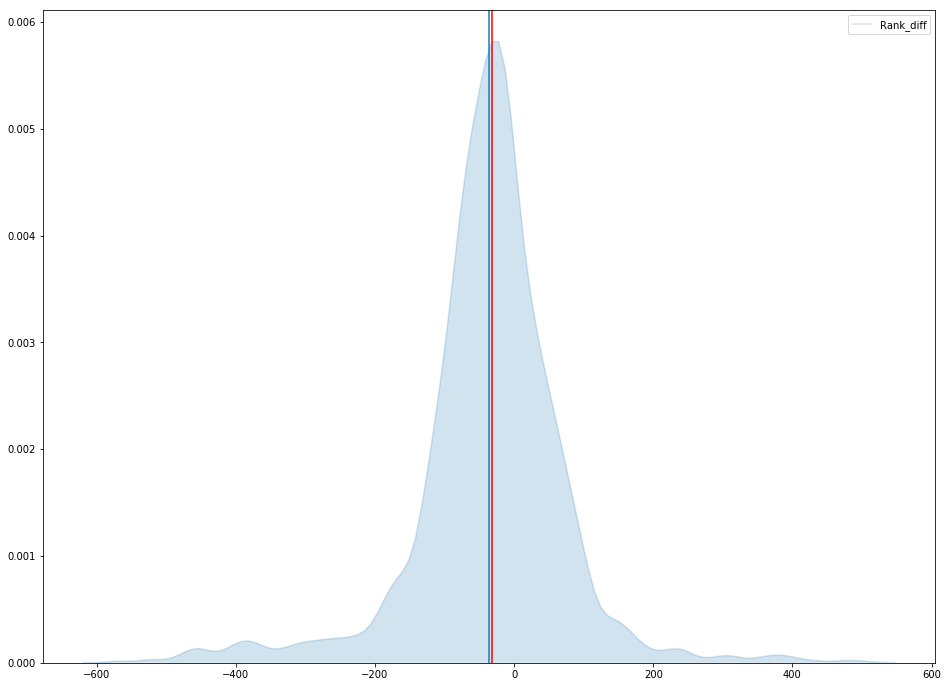

In [85]:
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(1,1,1)
sns.kdeplot(difdf['Rank_diff'],shade=True,alpha=.2,ax=ax)
meanline = mlines.Line2D([difdf['Rank_diff'].mean(),difdf['Rank_diff'].mean()],ax.get_ylim())
medianline = mlines.Line2D([difdf['Rank_diff'].median(),difdf['Rank_diff'].median()],ax.get_ylim(),color='r')
ax.add_line(meanline)
ax.add_line(medianline)
# ax.hist(difdf['Rank_diff'],bins=30,alpha=.2)
plt.show()

looks like ranking is an ok determiner of who won. Remember that the diff score is calculated by Winner - Loser, and that rank is the players' ATP ranking, so lower is better, therefore, we'd expect more negative numbers than positive numbers. Not as strong as id have hoped, but it makes sense, now im gonna see if this relationship is the same across different ranks and different rounds

['Qualifying' 'First Round' 'Second Round' 'Third Round' 'Fourth Round'
 'Quarter-finals' 'Semi-finals' 'Finals']
(782, 22)
(447, 22)
(221, 22)
(110, 22)
(56, 22)
(28, 22)
(14, 22)
(7, 22)


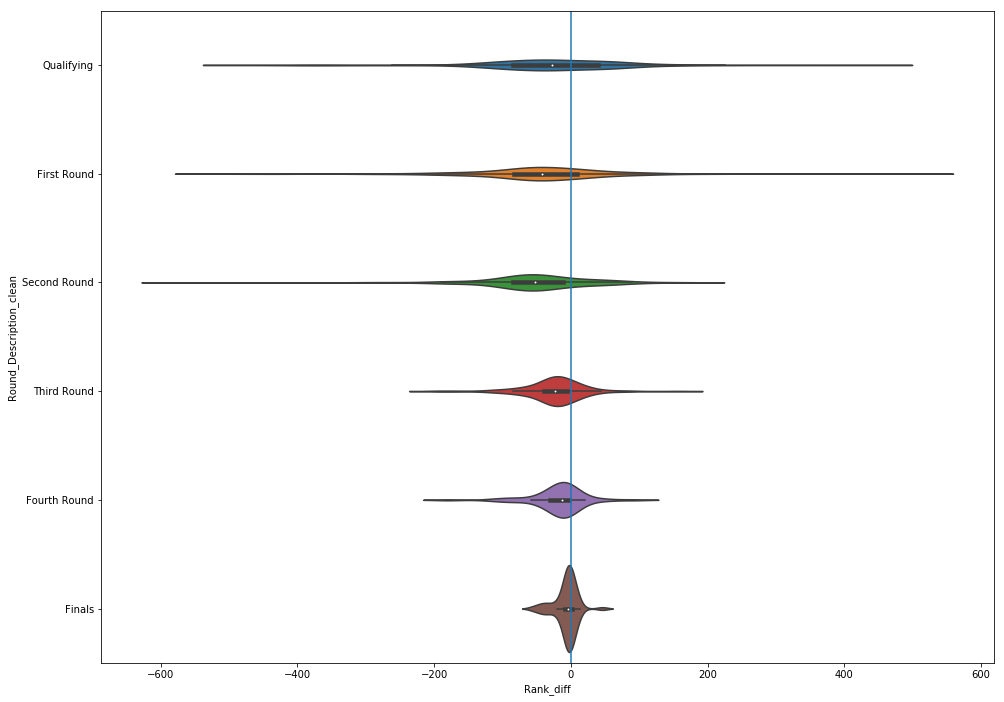

In [86]:
roundslist = difdf['Round_Description'].unique()
print(roundslist)
for rounds in roundslist:
    print(difdf[difdf['Round_Description']==rounds].shape)
#gonna concat 'Quarter-finals' 'Semi-finals' 'Finals' into 'Finals' to get more data
def concat_finals(row):
    if row['Round_Description'] in ['Quarter-finals','Semi-finals','Finals']:
        return "Finals"
    else:
        return row['Round_Description']
difdf['Round_Description_clean'] = difdf.apply(concat_finals,axis=1)
roundslist = difdf['Round_Description_clean'].unique()
fig,ax = plt.subplots(1,1,figsize=(16,12))
sns.violinplot(x='Rank_diff',y='Round_Description_clean',data = difdf,ax=ax)
zeroline = mlines.Line2D([0,0],ax.get_ylim())
ax.add_line(zeroline)

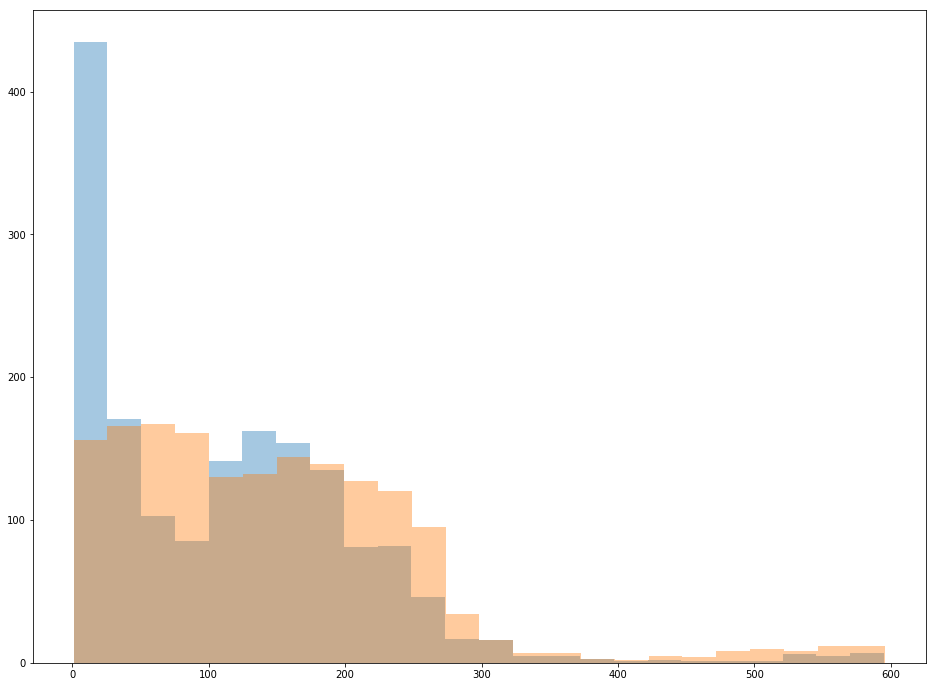

In [94]:
fig,ax = plt.subplots(1,1,figsize=(16,12))
plt.hist(winframe['Winner_Rank'],bins=24,alpha=.4)
plt.hist(loseframe['Loser_Rank'],bins=24,alpha=.4)
# sns.kdeplot(difdf['Rank_diff'],winframe['Winner_Rank'],shade=True,ax=ax)
plt.show()

[  0.  25.  50.  75. 100. 125. 150. 175. 200. 225. 250. 275. 300. 325.
 350. 375. 400. 425. 450. 475. 500. 525. 550. 575. 600.]


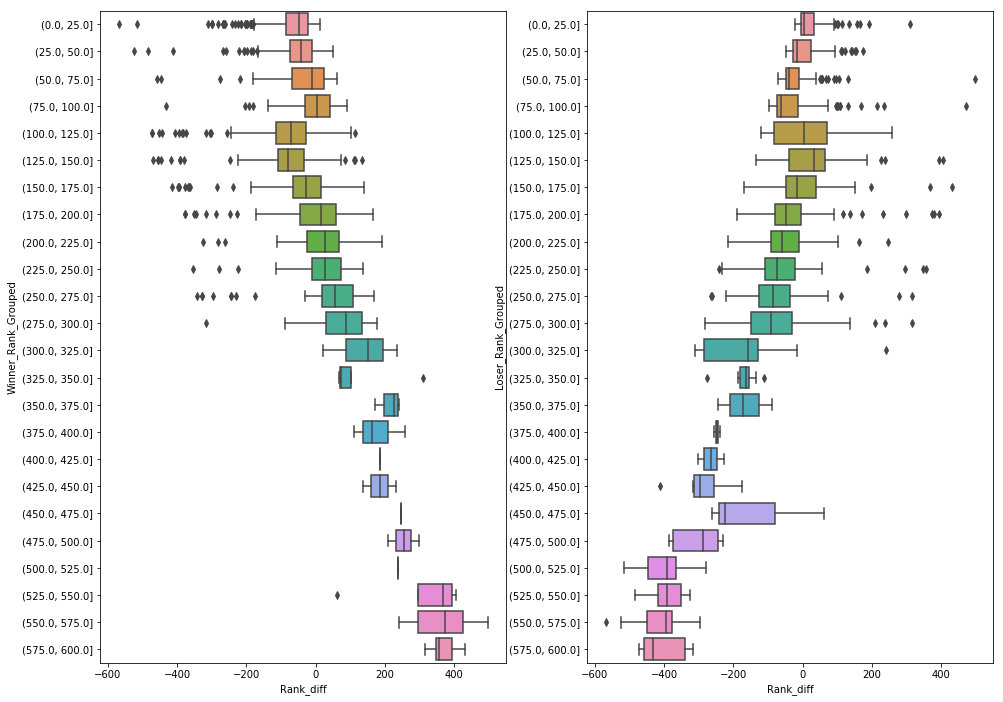

In [109]:
if 'Winner_Rank' not in difdf.columns:
    difdf = pd.concat([difdf,winframe['Winner_Rank']],axis=1)
if 'Loser_Rank' not in difdf.columns:
    difdf = pd.concat([difdf,loseframe['Loser_Rank']],axis=1)
bins = np.linspace(0,600,25)
print(bins)
difdf['Winner_Rank_Grouped'] = pd.cut(difdf.loc[:,'Winner_Rank'],bins=bins)
difdf['Loser_Rank_Grouped'] = pd.cut(difdf.loc[:,'Loser_Rank'],bins=bins)
fig,ax = plt.subplots(1,2,sharex='all',figsize=(16,12))
sns.boxplot(x="Rank_diff",y='Winner_Rank_Grouped',data=difdf,ax=ax[0])
sns.boxplot(x="Rank_diff",y='Loser_Rank_Grouped',data=difdf,ax=ax[1])
# sns.violinplot(x='Rank_diff',y='Loser_Rank_Grouped',data = difdf,ax=ax)
